### Info

In [157]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75978 entries, 0 to 75977
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         75978 non-null  object 
 1   year          75978 non-null  int64  
 2   transmission  75978 non-null  object 
 3   mileage       75978 non-null  int64  
 4   fuelType      75978 non-null  object 
 5   tax           69449 non-null  float64
 6   mpg           69449 non-null  float64
 7   engineSize    75978 non-null  float64
 8   make          75978 non-null  object 
 9   price         75978 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 5.8+ MB
None


In [158]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
0,Polo,2017,Manual,36874,Petrol,20.0,60.1,1.2,vw,10250
1,Fabia,2016,Manual,39386,Petrol,20.0,60.1,1.2,skoda,8250
2,Grandland X,2018,Automatic,8935,Diesel,145.0,57.7,1.5,vauxhall,16299
3,Fiesta,2016,Manual,18606,Petrol,20.0,62.8,1.0,ford,10199
4,Octavia,2015,Manual,26000,Diesel,30.0,61.4,2.0,skoda,12790
...,...,...,...,...,...,...,...,...,...,...
75973,E Class,2018,Semi-Auto,26695,Diesel,145.0,65.7,2.0,mercedes,22499
75974,Focus,2017,Manual,27491,Petrol,150.0,56.5,1.0,ford,13498
75975,C-HR,2017,Automatic,15977,Hybrid,135.0,74.3,1.8,toyota,21290
75976,Kuga,2017,Manual,29430,Diesel,30.0,64.2,1.5,ford,12498


In [159]:
print(df.describe())

               year        mileage           tax          mpg    engineSize  \
count  75978.000000   75978.000000  69449.000000  69449.00000  75978.000000   
mean    2017.100319   22967.622983    120.572362     55.19451      1.663712   
std        2.127747   21024.729721     63.192927     16.46193      0.555865   
min     1970.000000       1.000000      0.000000      0.30000      0.000000   
25%     2016.000000    7470.250000    125.000000     47.00000      1.200000   
50%     2017.000000   17265.500000    145.000000     54.30000      1.600000   
75%     2019.000000   32221.500000    145.000000     62.80000      2.000000   
max     2060.000000  323000.000000    580.000000    470.80000      6.600000   

               price  
count   75978.000000  
mean    16925.649543  
std      9728.759207  
min       450.000000  
25%     10277.000000  
50%     14750.000000  
75%     20980.000000  
max    149948.000000  


### EDA: Duplicados, Valores Faltantes, Outliers.

In [160]:
df.drop_duplicates(inplace=True)

In [161]:
missing_values = df.isnull().sum()
print(missing_values)

model              0
year               0
transmission       0
mileage            0
fuelType           0
tax             6030
mpg             6030
engineSize         0
make               0
price              0
dtype: int64


In [162]:
missing_report = df.isnull().sum().to_frame(name='Missing Values')
missing_report['% Missing'] = (missing_report['Missing Values'] / len(df)) * 100
missing_report = missing_report[missing_report['Missing Values'] > 0]  # solo columnas con NA
print(missing_report)


     Missing Values  % Missing
tax            6030   8.076722
mpg            6030   8.076722


In [163]:
df[df.isnull().any(axis=1)]


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
22,Focus,2018,Manual,15705,Petrol,NaN,NaN,1.0,ford,12700
28,Focus,2015,Manual,45323,Diesel,NaN,NaN,1.6,ford,7990
33,Focus,2018,Manual,15721,Petrol,NaN,NaN,1.0,ford,16495
41,Focus,2019,Manual,14581,Diesel,NaN,NaN,1.5,ford,15140
49,C Class,2019,Semi-Auto,1000,Petrol,NaN,NaN,2.0,mercedes,33599
...,...,...,...,...,...,...,...,...,...,...
75931,C Class,2016,Automatic,28968,Petrol,NaN,NaN,3.0,mercedes,31495
75934,C Class,2018,Semi-Auto,10010,Petrol,NaN,NaN,1.5,mercedes,24990
75939,Focus,2017,Manual,43839,Petrol,NaN,NaN,1.0,ford,8289
75945,Focus,2019,Manual,3211,Petrol,NaN,NaN,1.0,ford,16999


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
# Ver patrones
df[df['tax'].isna()].groupby('make').size()  # por ejemplo, agrupando por marca

# Ver correlaciones
df[['tax', 'mpg', 'price',]].corr()  # ¿están correlacionados? útil para imputación


,tax,mpg,price
tax,1.000000,-0.442987,0.306903
mpg,-0.442987,1.000000,-0.286566
price,0.306903,-0.286566,1.000000


In [166]:
df.groupby('make')['mpg'].mean().sort_values(ascending=False)


make
toyota      63.335984
ford        57.810630
bmw         56.874728
skoda       56.573424
mercedes    55.112161
hyundai     54.161757
vw          53.705603
vauxhall    51.501982
audi        50.807264
Name: mpg, dtype: float64

<Axes: xlabel='year'>

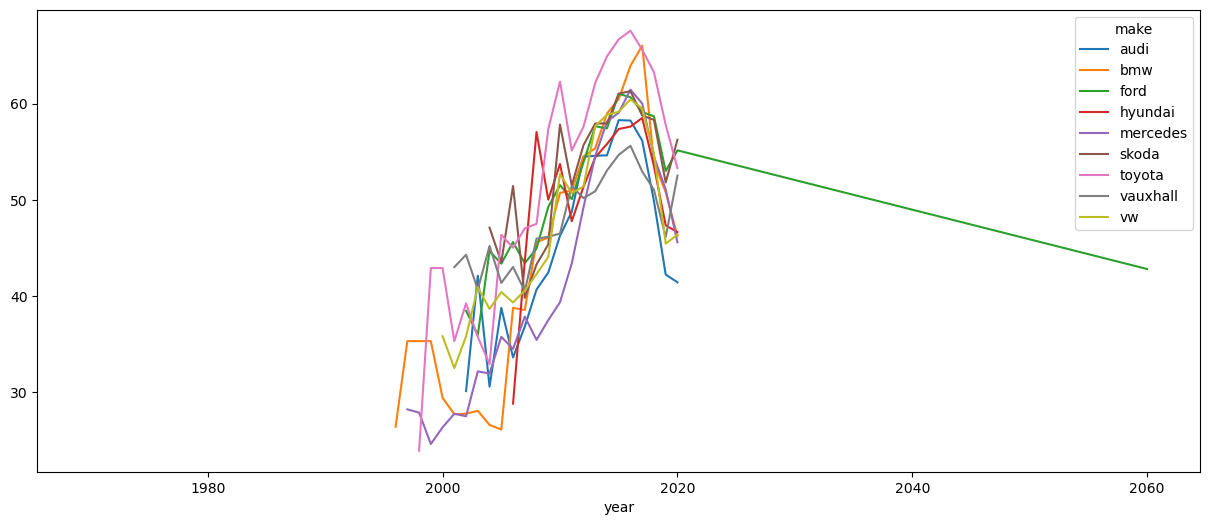

In [167]:
df.groupby(['make', 'year'])['mpg'].mean().unstack().T.plot(figsize=(15,6))


In [168]:
df['tax'] = df.groupby('make')['tax'].transform(lambda x: x.fillna(x.median()))
df['mpg'] = df.groupby('make')['mpg'].transform(lambda x: x.fillna(x.median()))


In [169]:
df[df.isnull().any(axis=1)]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price


In [170]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
0,Polo,2017,Manual,36874,Petrol,20.0,60.1,1.2,vw,10250
1,Fabia,2016,Manual,39386,Petrol,20.0,60.1,1.2,skoda,8250
2,Grandland X,2018,Automatic,8935,Diesel,145.0,57.7,1.5,vauxhall,16299
3,Fiesta,2016,Manual,18606,Petrol,20.0,62.8,1.0,ford,10199
4,Octavia,2015,Manual,26000,Diesel,30.0,61.4,2.0,skoda,12790
...,...,...,...,...,...,...,...,...,...,...
75973,E Class,2018,Semi-Auto,26695,Diesel,145.0,65.7,2.0,mercedes,22499
75974,Focus,2017,Manual,27491,Petrol,150.0,56.5,1.0,ford,13498
75975,C-HR,2017,Automatic,15977,Hybrid,135.0,74.3,1.8,toyota,21290
75976,Kuga,2017,Manual,29430,Diesel,30.0,64.2,1.5,ford,12498


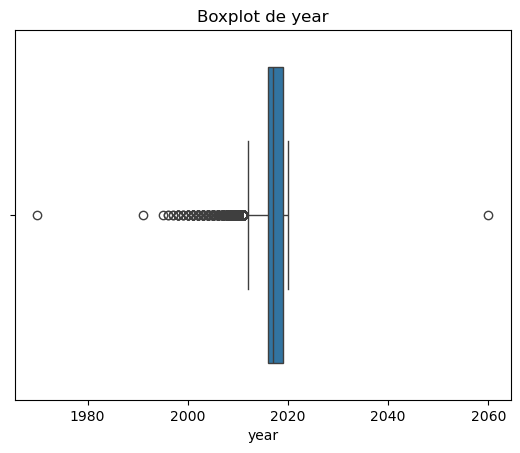

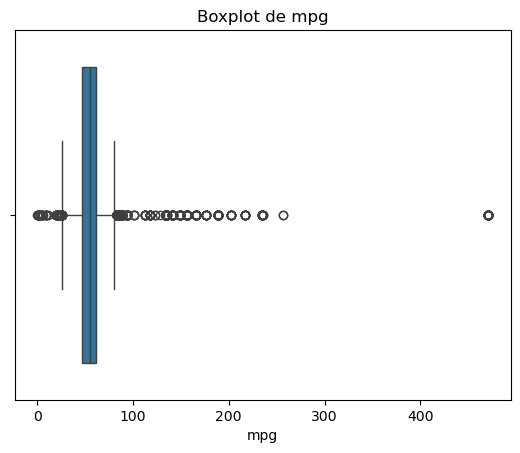

In [171]:
# outliers

sns.boxplot(x=df['year'])
plt.title("Boxplot de year")
plt.show()

sns.boxplot(x=df['mpg'])
plt.title("Boxplot de mpg")
plt.show()

In [172]:
# tratamiento de outlier en año
df['year'].value_counts().sort_index()


year
1970        1
1991        1
1995        1
1996        2
1997        2
1998        7
1999        3
2000        8
2001       14
2002       27
2003       27
2004       44
2005       61
2006       65
2007      117
2008      157
2009      222
2010      241
2011      342
2012      497
2013     1940
2014     3026
2015     5826
2016    11711
2017    16519
2018    10473
2019    20315
2020     3009
2060        1
Name: count, dtype: int64

In [173]:
df = df[df['year'] != 2060]



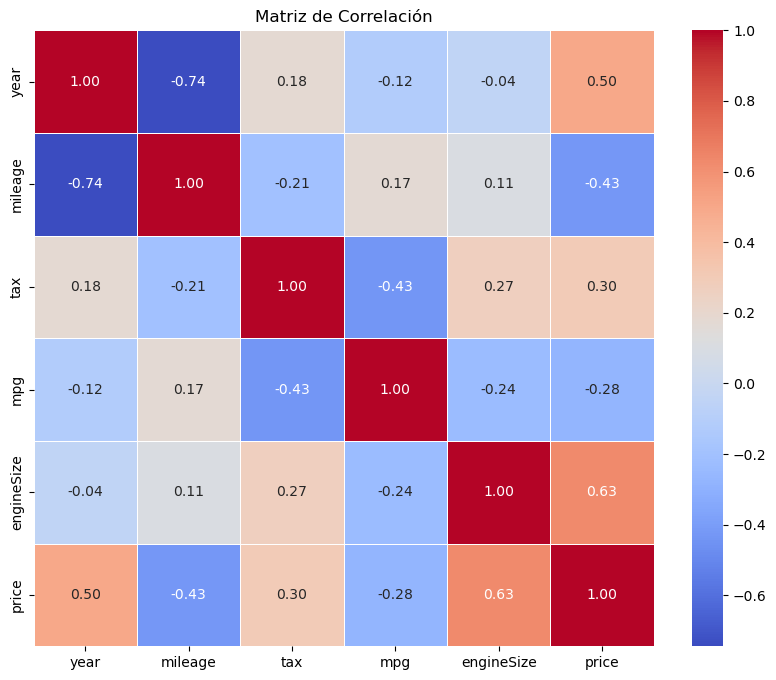

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualizarla con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [175]:
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
0,Polo,2017,Manual,36874,Petrol,20.0,60.1,1.2,vw,10250
1,Fabia,2016,Manual,39386,Petrol,20.0,60.1,1.2,skoda,8250
2,Grandland X,2018,Automatic,8935,Diesel,145.0,57.7,1.5,vauxhall,16299
3,Fiesta,2016,Manual,18606,Petrol,20.0,62.8,1.0,ford,10199
4,Octavia,2015,Manual,26000,Diesel,30.0,61.4,2.0,skoda,12790
...,...,...,...,...,...,...,...,...,...,...
75973,E Class,2018,Semi-Auto,26695,Diesel,145.0,65.7,2.0,mercedes,22499
75974,Focus,2017,Manual,27491,Petrol,150.0,56.5,1.0,ford,13498
75975,C-HR,2017,Automatic,15977,Hybrid,135.0,74.3,1.8,toyota,21290
75976,Kuga,2017,Manual,29430,Diesel,30.0,64.2,1.5,ford,12498


### Preprocesamiento

In [176]:
num_unique_brands = df['make'].nunique()

print(f"Hay {num_unique_brands} marcas diferentes.")

num_unique_models = df['model'].nunique()

print(f"Hay {num_unique_models} modelos diferentes.")

fuelType_unique = df['fuelType'].nunique()

print(f"Hay {fuelType_unique} tipos diferentes.")

transmission_unique = df['transmission'].nunique()

print(f"Hay {transmission_unique} transmisiones diferentes.")

Hay 9 marcas diferentes.
Hay 192 modelos diferentes.
Hay 5 tipos diferentes.
Hay 4 transmisiones diferentes.


In [177]:
print("Marcas únicas:", df['make'].unique())
print("Tipos de combustible:", df['fuelType'].unique())
print("Tipos de transmisión:", df['transmission'].unique())

Marcas únicas: ['vw' 'skoda' 'vauxhall' 'ford' 'toyota' 'bmw' 'mercedes' 'hyundai' 'audi']
Tipos de combustible: ['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']
Tipos de transmisión: ['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [178]:
# Aplicar One-Hot Encoding a categoricos
cols_to_encode = ['make', 'fuelType', 'transmission', 'model']
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Convertir las columnas con valores booleanos (True/False) a enteros (1/0)
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

print(df_encoded.head())


C:\Users\Mayco\AppData\Local\Temp\ipykernel_7228\3909254884.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


   year  mileage    tax   mpg  engineSize  price  make_bmw  make_ford  \
0  2017    36874   20.0  60.1         1.2  10250         0          0   
1  2016    39386   20.0  60.1         1.2   8250         0          0   
2  2018     8935  145.0  57.7         1.5  16299         0          0   
3  2016    18606   20.0  62.8         1.0  10199         0          1   
4  2015    26000   30.0  61.4         2.0  12790         0          0   

   make_hyundai  make_mercedes  ...  model_X7  model_Yaris  model_Yeti  \
0             0              0  ...         0            0           0   
1             0              0  ...         0            0           0   
2             0              0  ...         0            0           0   
3             0              0  ...         0            0           0   
4             0              0  ...         0            0           0   

   model_Yeti Outdoor  model_Z3  model_Z4  model_Zafira  model_Zafira Tourer  \
0                   0         0     

In [179]:
# Normalizacion de datos numericos

from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Creamos el escalador
scaler = MinMaxScaler()

# Aplicar la normalización a las variables numéricas
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print(df_encoded[numeric_columns].head())

   year   mileage       tax       mpg  engineSize
0  0.94  0.114158  0.034483  0.127099    0.181818
1  0.92  0.121935  0.034483  0.127099    0.181818
2  0.96  0.027660  0.250000  0.121998    0.227273
3  0.92  0.057601  0.034483  0.132837    0.151515
4  0.90  0.080493  0.051724  0.129862    0.303030


In [180]:
df_encoded

,year,mileage,tax,mpg,engineSize,price,make_bmw,make_ford,make_hyundai,make_mercedes,...,model_X7,model_Yaris,model_Yeti,model_Yeti Outdoor,model_Z3,model_Z4,model_Zafira,model_Zafira Tourer,model_i3,model_i8
0,0.94,0.114158,0.034483,0.127099,0.181818,10250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.92,0.121935,0.034483,0.127099,0.181818,8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.96,0.027660,0.250000,0.121998,0.227273,16299,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.92,0.057601,0.034483,0.132837,0.151515,10199,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.90,0.080493,0.051724,0.129862,0.303030,12790,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75973,0.96,0.082644,0.250000,0.139001,0.303030,22499,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
75974,0.94,0.085109,0.258621,0.119447,0.151515,13498,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
75975,0.94,0.049461,0.232759,0.157279,0.272727,21290,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75976,0.94,0.091112,0.051724,0.135813,0.227273,12498,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelos

In [181]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['price'])  # Datos preprocesados
y = df['price']  # Variable objetivo

# División 70-30 con shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # Semilla para reproducibilidad
    shuffle=True
)

print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (52260, 211), Prueba: (22398, 211)


In [182]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Definir modelos de regresion a comparar
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir en conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

# Mostrar comparativa final
print("\nComparativa de MAE en orden (baseline):")
for name, mae in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name}: {mae:.2f}")


Comparativa de MAE en orden (baseline):
Random Forest: 1230.85
XGBoost: 1375.80
Linear Regression: 2297.88


### Random Forest

In [183]:
rnd_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_train = rnd_clf.predict(X_train)
y_pred_test = rnd_clf.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test, y_pred_test)

# Resultados
print("\n Resultados De Random Forest con todas las features:")
print(f"- MAE en Train: {mae_train:.2f}")
print(f"- MAE en Test: {mae_test_rf:.2f}")


 Resultados De Random Forest con todas las features:
- MAE en Train: 466.86
- MAE en Test: 1230.85


### Optimizacion

#### Ajuste de mejores hiperparametros con randomized search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Hiperparámetros ajustados 
param_dist_rf = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [10, 15, 20],        
    'min_samples_split': [2, 3],      
    'min_samples_leaf': [1],
    'n_jobs': [-1]
}

rf_model = RandomForestRegressor(random_state=42)
random_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=8,  # Solo 8 combinaciones aleatorias
    cv=3,      # 3-fold CV
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

# se entrena random forest con randomized search para encontrar los mejores hiperparametros (datos de entrenamiento)
random_rf.fit(X_train, y_train)


# Se entrena nuevo modelo con mejores hiperparametros encontrados con randomized search (datos de prueba)
best_rf = random_rf.best_estimator_

y_pred_test = best_rf.predict(X_test)

mae_test_rf_rs = mean_absolute_error(y_test, y_pred_test)

# Resultados de Randomized Search
print("Mejores parámetros (Random Forest):", random_rf.best_params_)
print("MAE validacion cruzada:", -random_rf.best_score_)

# Resultados con ajuste de hiperparametros
print("\n Resultados De Random Forest con ajuste de hiperparametros Randomized Search:")
print(f"- MAE en Test: {mae_test_rf_rs:.2f}")


Mejores parámetros (Random Forest): {'n_jobs': -1, 'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 20}
MAE validacion cruzada: 1320.3707726732384

 Resultados De Random Forest con ajuste de hiperparametros Randomized Search:
- MAE en Test: 1265.11


#### Ajuste de mejores hiperparametros con Grid Search

In [185]:
# Combinaciones de Hiperparametros 
param_grid_rf = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [10, 15, 20],        
    'min_samples_split': [2, 3],      
    'min_samples_leaf': [1],
    'n_jobs': [-1]
}

rf_model = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,  
    cv=3,                      # 3-fold CV
    scoring='neg_mean_absolute_error',
    n_jobs=-1                  # Paraleliza en todos los núcleos
)


# se entrena random forest con Grid search para encontrar los mejores hiperparametros (datos de entrenamiento)
grid_rf.fit(X_train, y_train)

# Se entrena nuevo modelo con mejores hiperparametros encontrados con Grid search (datos de prueba)
best_rf_grid = grid_rf.best_estimator_ #construccion de nuevo modelo

y_pred_test_rf_grid = best_rf_grid.predict(X_test) #testeando el nuevo modelo

mae_test_rf_gs = mean_absolute_error(y_test, y_pred_test_rf_grid)

# Resultados de Randomized Search
print("Mejores parámetros (Random Forest):", grid_rf.best_params_)
print("MAE validacion cruzada:", -grid_rf.best_score_)

# Resultados con ajuste de hiperparametros
print("\n Resultados De Random Forest con ajuste de hiperparametros Grid Search:")
print(f"- MAE en Test: {mae_test_rf_gs:.2f}")

Mejores parámetros (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200, 'n_jobs': -1}
MAE validacion cruzada: 1318.9483830324898

 Resultados De Random Forest con ajuste de hiperparametros Grid Search:
- MAE en Test: 1264.13


#### Optimizar mediante seleccion de mejores features

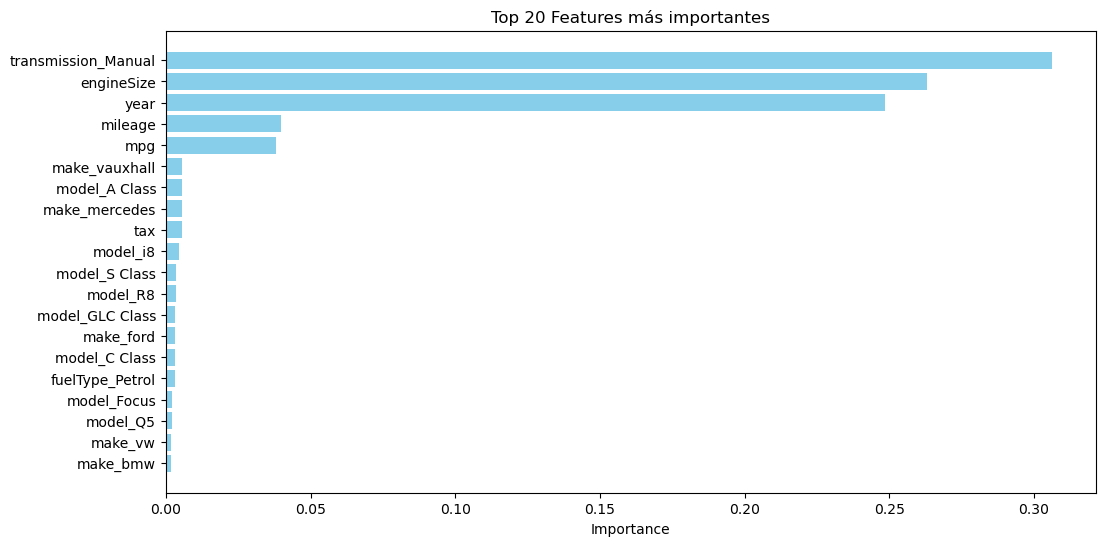

In [186]:
# Obtener importancias y nombres de las features
importances = best_rf_grid.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Crear DataFrame de importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

import matplotlib.pyplot as plt

# Graficar las top N features
top_n = 20 
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'].head(top_n), importance_df['Importance'].head(top_n), color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Features más importantes')
plt.gca().invert_yaxis()  # Mostrar la más importante arriba
plt.show()

In [204]:
threshold = 0.005  # 1% de importancia mínima
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].values
print(f"\nFeatures seleccionadas (importancia > {threshold}%):")
print(selected_features)


Features seleccionadas (importancia > 0.005%):
['transmission_Manual' 'engineSize' 'year' 'mileage' 'mpg' 'make_vauxhall'
 'model_A Class' 'make_mercedes' 'tax']


In [188]:
# Reducir los datasets con mejores variables seleccionadas
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Re-entrenar el modelo optimizado (con los mismos hiperparámetros Grid Search)
best_rf_sel = RandomForestRegressor(**grid_rf.best_params_, random_state=42) #contruir el modelo
best_rf_sel.fit(X_train_sel, y_train) #entrenar el modelo

# Evaluar
y_pred_sel = best_rf_sel.predict(X_test_sel)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
print(f"\nMAE de modelo con mejores features y ajuste de hiperparametros con Grid Search: {mae_sel:.2f}")


MAE de modelo con mejores features y ajuste de hiperparametros con Grid Search: 1661.55


### XGBoost

In [189]:
from xgboost import XGBRegressor

# Crear el modelo 
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test)

# Resultados
print("\n Resultados De XGBoost con todas las features:")
print(f"- MAE en Train: {mae_train:.2f}")
print(f"- MAE en Test: {mae_test_xgb:.2f}")



 Resultados De XGBoost con todas las features:
- MAE en Train: 1289.46
- MAE en Test: 1375.80


#### Optimizacion

##### Ajuste de mejores hiperparametros con grid search

In [190]:
# Combinaciones de Hiperparametros 
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# se entrena XGBoost con Grid search para encontrar los mejores hiperparametros (datos de entrenamiento)
grid_xgb.fit(X_train, y_train)

# Se entrena nuevo modelo con mejores hiperparametros encontrados con Grid search (datos de prueba)
best_xgb_grid = grid_xgb.best_estimator_ #construccion de nuevo modelo

y_pred_test_xgb_grid = best_xgb_grid.predict(X_test) #testeando el nuevo modelo

mae_test_xgb_opt = mean_absolute_error(y_test, y_pred_test_xgb_grid)

# Resultados de Grid Search
print("Mejores parámetros (XGBoost):", grid_xgb.best_params_)
print("MAE validacion cruzada:", -grid_xgb.best_score_)

# Resultados con ajuste de hiperparametros
print("\n Resultados De XGBoost con ajuste de hiperparametros Grid Search:")
print(f"- MAE en Test: {mae_test_xgb_opt:.2f}")


Mejores parámetros (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
MAE validacion cruzada: 1269.653564453125

 Resultados De XGBoost con ajuste de hiperparametros Grid Search:
- MAE en Test: 1251.77


#### Nuevo Ajuste fino de hiperparametros con Grid Search

In [206]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Hiperparámetros base obtenidos de la primera optimización
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 0.8
}

# Espacio de búsqueda ajustado (rango más estrecho alrededor de los mejores valores)
param_grid_fine = {
    'colsample_bytree': [0.7, 0.8],
    'learning_rate': [0.15, 0.2, 0.25],  # Rango más ajustado
    'n_estimators': [180, 200, 220],      # Pequeñas variaciones
    'max_depth': [6, 7, 8],               # Profundidad alrededor de 7
    'subsample': [0.7, 0.8],              # Valores cercanos al óptimo
    'gamma': [0, 0.1]                     # Nuevo parámetro para regularización
}

# Configurar GridSearchCV para optimización fina
fine_tune = GridSearchCV(
    estimator=XGBRegressor(**{k: v for k, v in best_params.items() if k not in param_grid_fine}),
    param_grid=param_grid_fine,
    cv=3,  # Reducir folds para mayor velocidad
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Ejecutar solo en el conjunto de entrenamiento
fine_tune.fit(X_train, y_train)

# Resultados
print("\nMejores parámetros (optimización fina):", fine_tune.best_params_)
print("Mejor MAE (validación):", -fine_tune.best_score_)

# Evaluar en test
best_xgb_fine = fine_tune.best_estimator_
y_pred_fine = best_xgb_fine.predict(X_test)
mae_fine = mean_absolute_error(y_test, y_pred_fine)
print(f"MAE en Test (modelo afinado): {mae_fine:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits

Mejores parámetros (optimización fina): {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.25, 'max_depth': 8, 'n_estimators': 220, 'subsample': 0.8}
Mejor MAE (validación): 1230.92041015625
MAE en Test (modelo afinado): 1174.91


#### Ajuste de Hiperparametros y seleccion de mejores features.

In [192]:
# Entrenar NUEVO modelo solo con features seleccionadas
grid_xgb_sel = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
    )
grid_xgb_sel.fit(X_train_sel, y_train)
    
best_xg_sel = grid_xgb_sel.best_estimator_

print("\nMejores parámetros (features seleccionadas):", grid_xgb_sel.best_params_)
    
y_pred_sel_test = best_xg_sel.predict(X_test_sel)
    
print("\nResultados XGBoost optimizado (features seleccionadas):")
print(f"- MAE Test: {mean_absolute_error(y_test, y_pred_sel_test):.2f}")



Mejores parámetros (features seleccionadas): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

Resultados XGBoost optimizado (features seleccionadas):
- MAE Test: 1654.71


### Resultado final

In [207]:
print("\nComparativa final optimizada:")
print(f"- Random Forest MAE: {mae_test_rf_gs:.2f}")
print(f"- XGBoost MAE: {mae_fine:.2f}")


Comparativa final optimizada:
- Random Forest MAE: 1264.13
- XGBoost MAE: 1174.91


#### Guardar el mejor modelo

In [194]:
import joblib

joblib.dump(best_xgb_fine, 'modelo_xgboost.pkl')

['modelo_xgboost.pkl']

In [195]:
best_xgb_fine.save_model('modelo_xgb.json')

### Hacer predicciones usando mi mejor modelo sobre test.csv 

In [196]:
import pandas as pd
import xgboost as xgb
import joblib

# Cargar el modelo entrenado 
model = joblib.load('modelo_xgboost.pkl')

# dataset de prueba
test_data = pd.read_csv('test.csv')


In [197]:
# Aplicar One-Hot Encoding a categoricos
cols_to_encode = ['make', 'fuelType', 'transmission', 'model']
df_encoded = pd.get_dummies(test_data, columns=cols_to_encode, drop_first=True)

# Convertir las columnas con valores booleanos (True/False) a enteros (1/0)
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

print(df_encoded.head())

C:\Users\Mayco\AppData\Local\Temp\ipykernel_7228\2081392246.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


   year  mileage    tax   mpg  engineSize  make_bmw  make_ford  make_hyundai  \
0  2019     1000  145.0  56.5         2.0         0          0             0   
1  2016    33965   30.0  55.0         1.3         0          0             0   
2  2019    12264  145.0  51.4         1.6         0          0             0   
3  2017    11536  125.0  51.4         1.4         0          0             0   
4  2019     5197  145.0  43.5         1.4         0          0             0   

   make_mercedes  make_skoda  ...  model_X7  model_Yaris  model_Yeti  \
0              1           0  ...         0            0           0   
1              0           0  ...         0            1           0   
2              0           0  ...         0            0           0   
3              0           0  ...         0            0           0   
4              0           0  ...         0            0           0   

   model_Yeti Outdoor  model_Z3  model_Z4  model_Zafira  model_Zafira Tourer  \
0     

In [198]:
# Normalizacion de datos numericos

from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Creamos el escalador
scaler = MinMaxScaler()

# Aplicar la normalización a las variables numéricas
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print(df_encoded[numeric_columns].head())

   year   mileage       tax       mpg  engineSize
0  0.98  0.003330  0.250000  0.117948    0.303030
1  0.92  0.113214  0.051724  0.114754    0.196970
2  0.98  0.040877  0.250000  0.107090    0.242424
3  0.94  0.038450  0.215517  0.107090    0.212121
4  0.98  0.017320  0.250000  0.090270    0.212121


In [200]:
print("Columnas en el modelo:", model.get_booster().feature_names)
print("Columnas en X_Test:", X_test.columns)

Columnas en el modelo: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'make_bmw', 'make_ford', 'make_hyundai', 'make_mercedes', 'make_skoda', 'make_toyota', 'make_vauxhall', 'make_vw', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'model_2 Series', 'model_200', 'model_220', 'model_3 Series', 'model_4 Series', 'model_5 Series', 'model_6 Series', 'model_7 Series', 'model_8 Series', 'model_A Class', 'model_A1', 'model_A2', 'model_A3', 'model_A4', 'model_A5', 'model_A6', 'model_A7', 'model_A8', 'model_Accent', 'model_Adam', 'model_Agila', 'model_Amarok', 'model_Amica', 'model_Ampera', 'model_Antara', 'model_Arteon', 'model_Astra', 'model_Auris', 'model_Avensis', 'model_Aygo', 'model_B Class', 'model_B-MAX', 'model_Beetle', 'model_C Class', 'model_C-HR', 'model_C-MAX', 'model_CC', 'model_CL Class', 'model_CLA Class', 'model_CLC Class', 'model_CLK', 'model_CLS Class', 'model_Caddy', 'model_

In [201]:
if 'transmission_Other' not in test_data.columns:
    test_data['transmission_Other'] = 0  # O el valor que corresponda

In [202]:
# Asegurar que el test tenga las mismas columnas que el training
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [203]:
submission = pd.DataFrame({
    'id': range(1, len(predictions)+1),  # Asegúrate de que 'id' sea la columna correcta
    'price': predictions
})

# Guardar el archivo de submission
submission.to_csv('sample_submission.csv', index=False)

print("Archivo 'sample_submission.csv' generado con éxito.")

Archivo 'sample_submission.csv' generado con éxito.
